# Preview dataset

In [1]:
import pandas as pd
## https://archive.ics.uci.edu/ml/datasets/Auto+MPG
df = pd.read_csv('auto.csv')
## mpg: 每加侖燃料所行英里數；displacement: 排氣量；horsepower: 馬力；acceleration: 加速度
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 7 columns):
mpg       392 non-null float64
displ     392 non-null float64
hp        392 non-null int64
weight    392 non-null int64
accel     392 non-null float64
origin    392 non-null object
size      392 non-null float64
dtypes: float64(4), int64(2), object(1)
memory usage: 21.6+ KB


In [2]:
df.head()

,mpg,displ,hp,weight,accel,origin,size
0,18.0,250.0,88,3139,14.5,US,15.0
1,9.0,304.0,193,4732,18.5,US,20.0
2,36.1,91.0,60,1800,16.4,Asia,10.0
3,18.5,250.0,98,3525,19.0,US,15.0
4,34.3,97.0,78,2188,15.8,Europe,10.0


In [3]:
import numpy as np
## 將 origin 中的字符串轉為整數，以方便後續處理
def convert_origin(value):
    new_value = value.replace('Asia', '0').replace('Europe', '1').replace('US', '2')
    return np.int(new_value)

df['origin'] = df['origin'].apply(convert_origin)
df.head()

,mpg,displ,hp,weight,accel,origin,size
0,18.0,250.0,88,3139,14.5,2,15.0
1,9.0,304.0,193,4732,18.5,2,20.0
2,36.1,91.0,60,1800,16.4,0,10.0
3,18.5,250.0,98,3525,19.0,2,15.0
4,34.3,97.0,78,2188,15.8,1,10.0


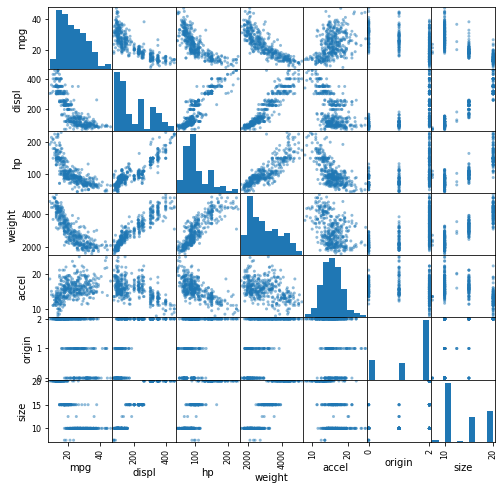

In [4]:
from pandas.plotting import scatter_matrix
_ = scatter_matrix(df, figsize = [8, 8])

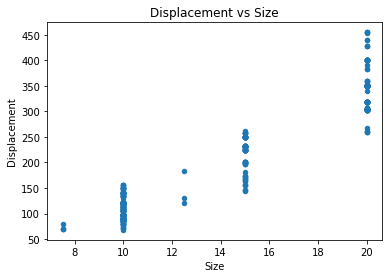

In [5]:
import matplotlib.pyplot as plt
df.plot(kind='scatter', x='size', y='displ')

plt.title('Displacement vs Size')
plt.xlabel('Size')
plt.ylabel('Displacement')

plt.show()

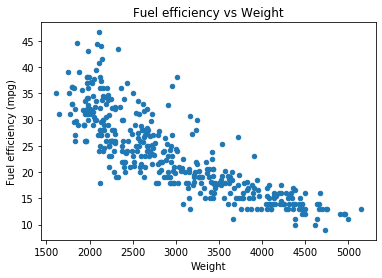

In [6]:
df.plot(kind='scatter', x='weight', y='mpg')

plt.title('Fuel efficiency vs Weight')
plt.xlabel('Weight')
plt.ylabel('Fuel efficiency (mpg)')

plt.show()

# Classification

In [7]:
from sklearn.model_selection import train_test_split

## 通過排氣量推算體積
## Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.
X = df['displ'].values.reshape(-1, 1)
## You are passing floats to a classifier which expects categorical values as the target vector
y = df['size'].values.astype('int')
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

def get_modle(Model):
    model = Model()
    model.fit(X_train, y_train)
    print(model.score(X_test, y_test))
    return model

print(X[:10])
print(y[:10])

[[250.]
 [304.]
 [ 91.]
 [250.]
 [ 97.]
 [119.]
 [108.]
 [121.]
 [302.]
 [302.]]
[15 20 10 15 10 10 10 10 20 20]


In [8]:
from sklearn.neighbors import KNeighborsClassifier

knn = get_modle(KNeighborsClassifier)

0.9795918367346939


In [9]:
from sklearn.linear_model import LogisticRegression

lr_ovr = get_modle(LogisticRegression)

0.7448979591836735
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [10]:
from sklearn.svm import SVC

svm = get_modle(SVC)

0.9897959183673469
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [11]:
from sklearn.svm import LinearSVC

l_svm = get_modle(LinearSVC)

0.7448979591836735
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [12]:
## Multi-class
lr_mn = LogisticRegression(multi_class="multinomial", solver="lbfgs")
lr_mn.fit(X_train, y_train)
lr_mn.score(X_test, y_test)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9795918367346939

In [13]:
from sklearn.model_selection import GridSearchCV

svm = SVC()
parameters = {'C':[0.1, 1, 10], 'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1]}
searcher = GridSearchCV(svm, parameters)
searcher.fit(X_train, y_train)

print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)
print("Test accuracy of best grid search hypers:", searcher.score(X_test,  y_test), '\n')

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
Best CV params {'C': 1, 'gamma': 0.01}
Best CV accuracy 0.935374149659864
Test accuracy of best grid search hypers: 0.9795918367346939 

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [14]:
from sklearn.linear_model import SGDClassifier

linear_classifier = SGDClassifier(random_state=0)
parameters = {'alpha':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1], 
             'loss':['hinge', 'log'], 'penalty':['l1','l2']}
searcher = GridSearchCV(linear_classifier, parameters, cv=10)
searcher.fit(X_train, y_train)

print("\nBest CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)
print("Test accuracy of best grid search hypers:", searcher.score(X_test, y_test), '\n')

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve

# Regression

In [15]:
X = df['mpg'].values.reshape(-1, 1)
y = df['weight'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

0.7182748140968538


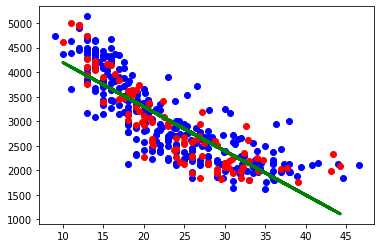

In [16]:
from sklearn.linear_model import LinearRegression 

reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print(reg.score(X_test, y_test))

plt.scatter(X_train, y_train, color = 'blue') 
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, y_pred, color='green', linewidth=3) 
plt.show()